In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

%matplotlib inline

In [2]:
# load activity data
activityData = pd.read_csv("dailyActivity_merged.csv")
activityData

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


<AxesSubplot:xlabel='TotalSteps', ylabel='Calories'>

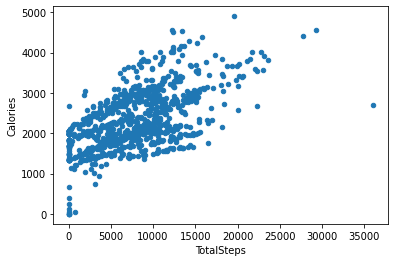

In [3]:
activityData.plot.scatter(x = 'TotalSteps', y = 'Calories')

The calories vs total steps scatter plot does not have a clear trend line, let's use KMeans clustering to look for more structure

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [5]:
# scale required data
scaler = StandardScaler()
scaler.fit(activityData[['TotalSteps', 'Calories']])
scaled_features = scaler.transform(activityData[['TotalSteps', 'Calories']])

In [6]:
df_scaled = pd.DataFrame(scaled_features,columns=['TotalSteps', 'Calories'])
df_scaled.head()

,TotalSteps,Calories
0,1.086469,-0.443879
1,0.609130,-0.705796
2,0.555044,-0.735053
3,0.417762,-0.778241
4,0.989506,-0.613846


In [14]:
kmeans = KMeans(n_clusters=2)

In [15]:
kmeans.fit(df_scaled)

KMeans(n_clusters=2)

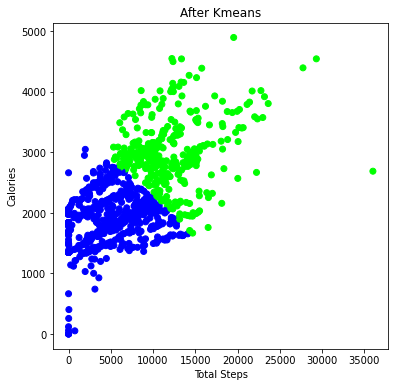

In [16]:
plt.figure(figsize=(6, 6))
plt.title('After Kmeans')
plt.xlabel('Total Steps')
plt.ylabel('Calories')
plt.scatter(activityData['TotalSteps'], activityData['Calories'], c=kmeans.labels_,cmap='brg')

Can the elbow method help me determine the best number of clusters? Followin method is inspired by the following article
https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f

In [27]:
sum_squared = []
K_set = range(1, 15)
for k in K_set:
    km = KMeans(n_clusters=k)
    km = km.fit(df_scaled)
    sum_squared.append(km.inertia_)

In [28]:
#sum_squared

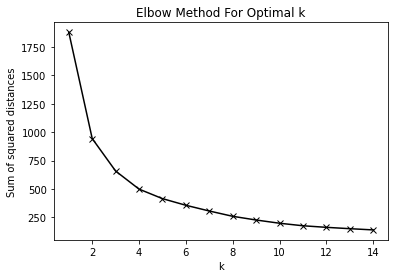

In [29]:
plt.plot(K_set, sum_squared, 'kx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Elbow aroound 6 or 7? Let's examine the data with k= 6

In [34]:
kbest = KMeans(n_clusters=6)
kbest = kbest.fit(df_scaled)

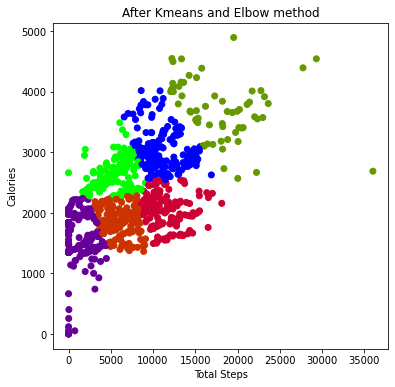

In [35]:
plt.figure(figsize=(6, 6))
plt.title('After Kmeans and Elbow method')
plt.xlabel('Total Steps')
plt.ylabel('Calories')
plt.scatter(activityData['TotalSteps'], activityData['Calories'], c=kbest.labels_,cmap='brg')

This does a good job of segmenting the group of users who walked less than 5000 steps and those that walked more than about 20000 steps. In between segements don't seem to be well defined

In [37]:
# load sleep data
sleepData = pd.read_csv("sleepDay_merged.csv")
sleepData

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712
...,...,...,...,...,...
408,8792009665,4/30/2016 12:00:00 AM,1,343,360
409,8792009665,5/1/2016 12:00:00 AM,1,503,527
410,8792009665,5/2/2016 12:00:00 AM,1,415,423
411,8792009665,5/3/2016 12:00:00 AM,1,516,545


<AxesSubplot:xlabel='TotalTimeInBed', ylabel='TotalMinutesAsleep'>

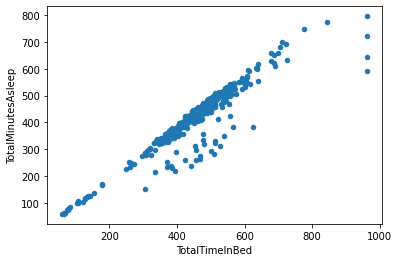

In [42]:
sleepData.plot.scatter(x='TotalTimeInBed', y='TotalMinutesAsleep')

There is a strong positive relationship here, which does make sense. There looks to be 2-3 groups, what does kmeans pick up?

In [51]:
# scale required data
scaler = StandardScaler()
scaler.fit(sleepData[['TotalTimeInBed', 'TotalMinutesAsleep']])
scaled_sleep= scaler.transform(sleepData[['TotalTimeInBed', 'TotalMinutesAsleep']])

In [52]:
df_scaled_sleep = pd.DataFrame(scaled_sleep,columns=['TotalTimeInBed', 'TotalMinutesAsleep'])

In [57]:
ksleep= KMeans(n_clusters=3)
ksleep = ksleep.fit(df_scaled_sleep)

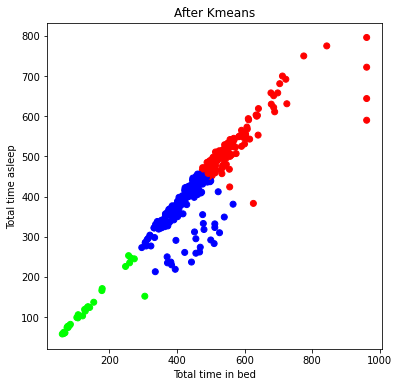

In [58]:
plt.figure(figsize=(6, 6))
plt.title('After Kmeans')
plt.xlabel('Total time in bed')
plt.ylabel('Total time asleep')
plt.scatter(sleepData['TotalTimeInBed'], sleepData['TotalMinutesAsleep'], c=ksleep.labels_,cmap='brg')